<a href="https://colab.research.google.com/github/lucas-fpaiva/Forroset/blob/main/code/part3_groups_spatial_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MATOPIBA emissions profile

### Part 2: Groups profile and intrepretation


In [18]:
#Installing all libraries used for analysis
import numpy as np
import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# #statistical tests
# from scipy import stats
# from scipy.stats import ttest_ind
# from scipy.stats import mannwhitneyu
# from scipy.stats import bartlett


# #Installing all libraries used for visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import seaborn as sns
# from pandas.plotting import radviz
# import matplotlib.gridspec as gridspec

#Installing all libraries used for data inputation
# from sklearn.impute import KNNImputer

# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

## Database 

In [2]:
#Collecting the Matopiba Emissions Data
!git clone https://github.com/lucas-fpaiva/matopiba_emissions.git

Cloning into 'matopiba_emissions'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 213 (delta 55), reused 4 (delta 1), pack-reused 121
Receiving objects: 100% (213/213), 40.66 MiB | 6.43 MiB/s, done.
Resolving deltas: 100% (98/98), done.


## Identified groups interpretation

In [3]:
data = pd.read_csv('/content/matopiba_emissions/data/matopiba_groups.csv')

In [4]:
correct_color = [(0.3764705882352941, 0.3764705882352941, 0.3764705882352941, 1),
                 (0, 0, 0.6470588235294118, 1),
                 (0, 0.6666666666666666, 0.6274509803921569, 1),
                 (0, 0.9764705882352941, 0, 1),
                 (0.8431372549019608, 0, 0, 1),
                 (1.0, 0.807843137254902, 0.0392156862745098, 1),
                 (0.1, 0.1, 0.1, 1)]

features=["Agriculture","LUC","Energy","Waste"]
features_group=["Agriculture","LUC","Energy","Waste","group"]


# Spatial observation

In [8]:
df_graf = pd.read_csv("/content/matopiba_emissions/data/matopiba_groups.csv")
df_graf= df_graf[['States', 'Municipalities', 'emi_2018','group_name','group','pib_2018','population','Agriculture','LUC','Energy','Waste']]
df_graf['ID']=df_graf["Municipalities"]+df_graf['States']
df_graf.head()

,States,Municipalities,emi_2018,group_name,group,pib_2018,population,Agriculture,LUC,Energy,Waste,ID
0,TO,Abreulândia,415469.12,G1,1,52402.19,2564,0.307672,0.689238,0.001277,0.001814,AbreulândiaTO
1,MA,Açailândia,2012738.15,G1,1,2602790.66,111757,0.348744,0.513556,0.110196,0.027504,AçailândiaMA
2,MA,Afonso Cunha,77780.74,G5,5,50235.77,6468,0.094138,0.758761,0.129712,0.017389,Afonso CunhaMA
3,MA,Água Doce do Maranhão,28598.70,G1,1,86186.06,12488,0.244302,0.530653,0.137829,0.087216,Água Doce do MaranhãoMA
4,TO,Aguiarnópolis,116760.47,G3,3,124903.42,6571,0.177852,0.271308,0.534922,0.015919,AguiarnópolisTO


In [9]:
!git clone https://github.com/tbrugz/geodata-br.git

Cloning into 'geodata-br'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 82 (delta 11), reused 10 (delta 10), pack-reused 58
Unpacking objects: 100% (82/82), done.


In [10]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 10.7 MB/s 
     |████████████████████████████████| 16.7 MB 176 kB/s 
     |████████████████████████████████| 6.3 MB 12.3 MB/s 


In [11]:
correct_color = [(0.3764705882352941, 0.3764705882352941, 0.3764705882352941, 1),
                 (0, 0, 0.6470588235294118, 1),
                 (0, 0.6666666666666666, 0.6274509803921569, 1),
                 (0, 0.9764705882352941, 0, 1),
                 (0.8431372549019608, 0, 0, 1),
                 (1.0, 0.807843137254902, 0.0392156862745098, 1),
                 (0.1, 0.1, 0.1, 1)]

In [12]:
df_loc = pd.read_csv('/content/matopiba_emissions/data/municipalities_loc.csv',error_bad_lines=False,encoding='latin-1')
df_loc = df_loc.loc[df_loc['codigo_uf'].isin([17,21,22,29])]
df_loc['codigo_uf'] = df_loc['codigo_uf'].map({17:'TO',
                             21:'MA',
                             22:'PI',
                             29:'BA'},
                             na_action=None)
df_loc.rename(columns={"nome":"CIDADES",'codigo_uf':'ESTADOS','latitude':'lat','longitude':'long','codigo_ibge':'ibge_code'}, inplace=True)
df_loc['ID'] = df_loc["CIDADES"]+df_loc['ESTADOS']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
df_loc.head()

,ibge_code,CIDADES,lat,long,capital,ESTADOS,siafi_id,ddd,fuso_horario,ID
6,2900108,Abaíra,-13.24880,-41.6619,0,BA,3301,77,America/Sao_Paulo,AbaíraBA
7,2900207,Abaré,-8.72073,-39.1162,0,BA,3303,75,America/Sao_Paulo,AbaréBA
14,1700251,Abreulândia,-9.62101,-49.1518,0,TO,337,63,America/Sao_Paulo,AbreulândiaTO
16,2100055,Açailândia,-4.94714,-47.5004,0,MA,961,99,America/Sao_Paulo,AçailândiaMA
17,2900306,Acajutiba,-11.65750,-38.0197,0,BA,3305,75,America/Sao_Paulo,AcajutibaBA


In [14]:
df_graf=df_graf.merge(df_loc[['ID','lat','long','ibge_code']],on='ID')

No handles with labels found to put in legend.


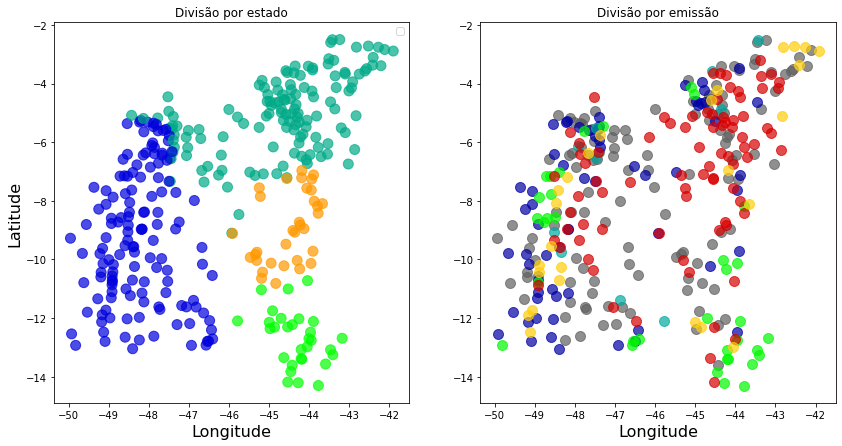

In [19]:
plt.figure(figsize=(14,7))
plt.subplot(121)

color = []
for j in df_graf["States"]:
  if j=="TO":
    i=1
  if j=="MA":
    i=2
  if j=="BA":
    i=3
  if j=="PI":
    i=4
  color.append(cm.nipy_spectral(float(i)/5))

plt.title("Divisão por estado")
plt.ylabel("Latitude",fontsize=16)
plt.scatter(df_graf["long"],df_graf["lat"], s=100, c=color, alpha=0.7) #, s=df_graf['emi_geral_2018']/10000
plt.xlabel("Longitude",fontsize=16)
# plt.ylabel("Latitude",fontsize=16)
plt.legend()



plt.subplot(122)
for i in range(1,7):
  color = correct_color[i-1]
  plt.scatter(df_graf[df_graf.group==i]["long"],df_graf[df_graf.group==i]["lat"], s=100,  color=color, alpha=0.7)#s=df_graf['emi_geral_2018']/10000,
plt.title("Divisão por emissão")
plt.xlabel("Longitude",fontsize=16)



plt.show()


In [20]:
df_graf.count()

States            337
Municipalities    337
emi_2018          337
group_name        337
group             337
pib_2018          337
population        337
Agriculture       337
LUC               337
Energy            337
Waste             337
ID                337
lat               337
long              337
ibge_code         337
dtype: int64

In [21]:
correct_html_color = ['#606060','#0000A5','#00AAA0','#00F900','#D70000','#FFCE0A']

In [22]:
import pandas as pd
import folium
map = folium.Map(location=[df_graf.lat.mean(), df_graf.long.mean()], zoom_start=5, control_scale=True)

for i in range(0,df_graf.shape[0]):

    color = correct_html_color[df_graf.group[i]-1]
    folium.CircleMarker([df_graf.lat[i],
                   df_graf.long[i]],
                       radius=5,
                color=color,
                fill=True,
                fill_color=color,
                popup=str('<i>' +df_graf.Municipalities[i]+ ':' +df_graf.group_name[i]+ '('+str(df_graf.lat[i])+'-'+str(df_graf.long[i])+')'+'</i>')
                  ).add_to(map)

map

In [ ]:
# map.save('/content/map_matopiba.html')

## Adicionando informação de área

In [23]:
import geopandas as gpd
df_geo = gpd.read_file('/content/geodata-br/geojson/geojs-100-mun.json')
df_geo.rename(columns={'id':'ibge_code'},inplace=True)
df_geo['ibge_code'] = df_geo['ibge_code'].astype(int)
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5564 entries, 0 to 5563
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ibge_code    5564 non-null   int64   
 1   name         5564 non-null   object  
 2   description  5564 non-null   object  
 3   geometry     5564 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 174.0+ KB


In [24]:
df_graf = df_graf.merge(df_geo,on='ibge_code')

In [25]:
data_graph=df_graf.copy()
data_graph.rename(columns={'ibge_code':'id'},inplace=True)
data_graph['id']=data_graph['id'].astype(str)

In [26]:

color_map= [[1,'rgb(0.3764705882352941, 0.3764705882352941, 0.3764705882352941)'],
 [1,'rgb(0, 0, 0.6470588235294118)'],
 [1,'rgb(0, 0.6666666666666666, 0.6274509803921569)'],
 [1,'rgb(0,  0.9764705882352941, 0)'],
 [1,'rgb(0.8431372549019608, 0, 0)'],
 [1,'rgb(1.0, 0.807843137254902, .0392156862745098)']]


In [27]:
import geopandas as gpd

data_map = gpd.read_file('/content/geodata-br/geojson/geojs-100-mun.json')
data_test = data_graph[['group','id','group_name','lat','long',"States"]]
data_map=data_map.merge(data_test,on='id')


In [28]:
xm = [data_map['lat'].min(), data_map['lat'].max()]
ym = [data_map['long'].min(), data_map['long'].max()]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' o

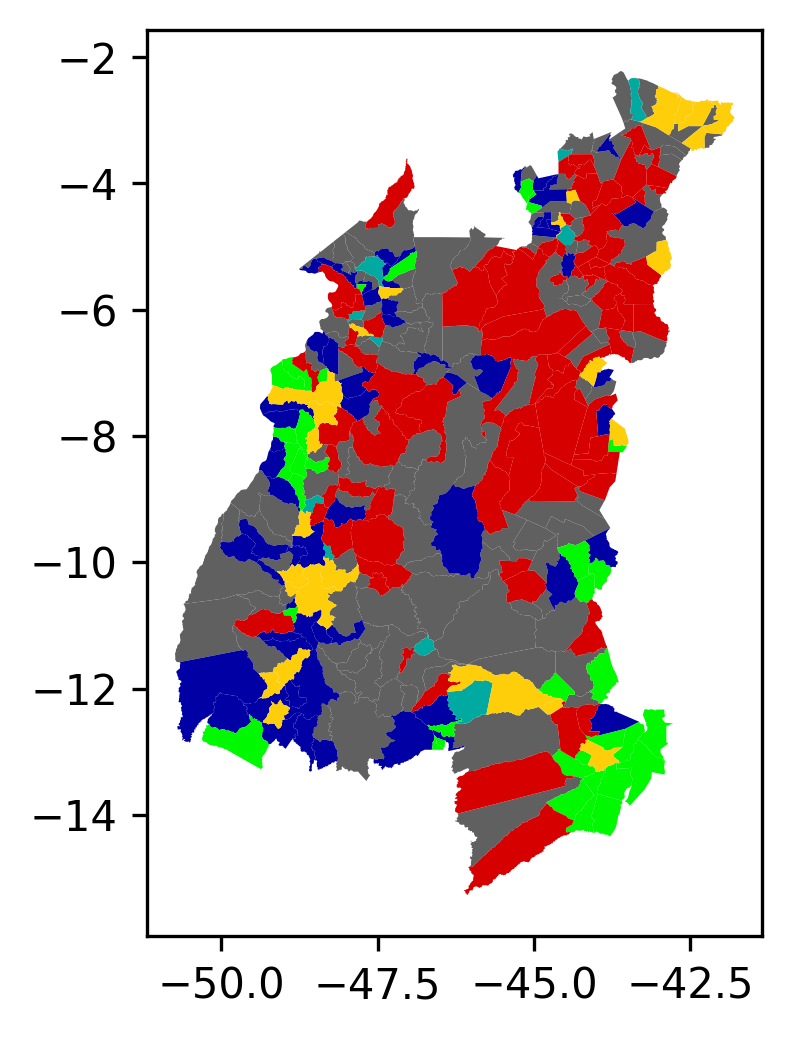

In [29]:
fig, ax = plt.subplots(1, 1,dpi=300)

for i in range(1,7):

  data_map[data_map.group==i].plot(column='group',color=correct_color[i-1],ax=ax,legend=True)

  
  plt.savefig("/content/matopiba_emissions/output/map_group.pdf", format="pdf", dpi=1000)  

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


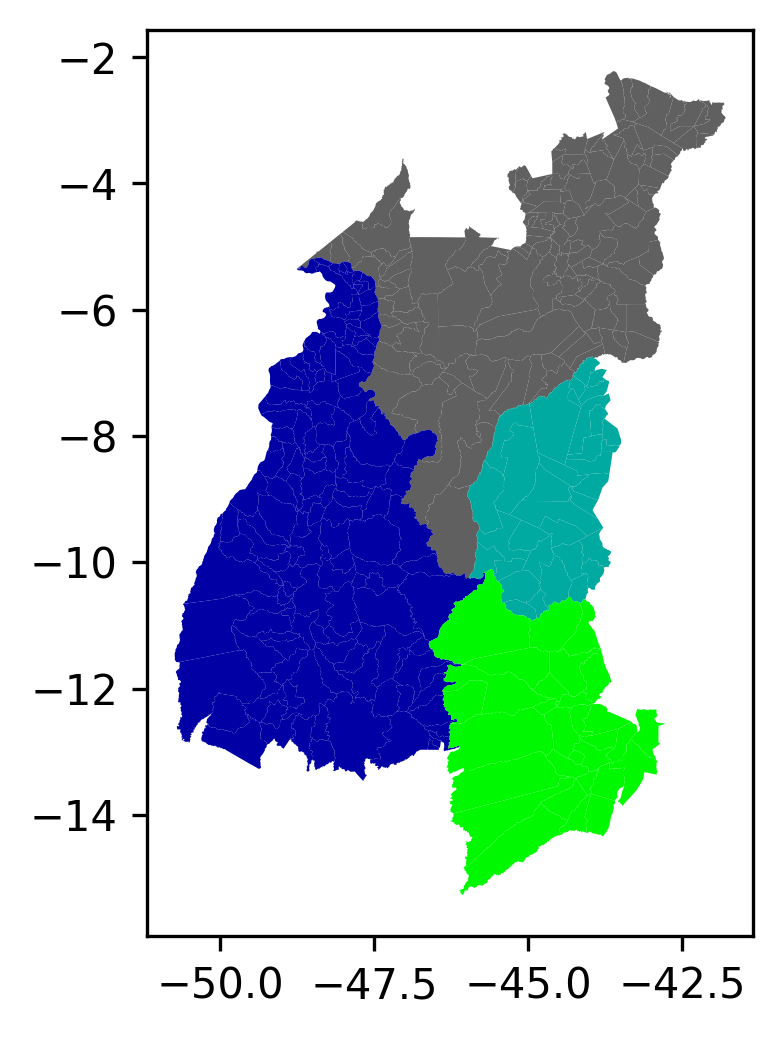

In [30]:
fig, ax = plt.subplots(1, 1,dpi=300)
# sns.set_theme(context='notebook', style='darkgrid')

sta= ["MA","TO","PI","BA"]

for i in range(0,4):

  data_map[data_map.States==sta[i]].plot(column='States',color=correct_color[i],ax=ax,legend=True)

  
  plt.savefig("/content/matopiba_emissions/output/map_states.pdf", format="pdf", dpi=1000)  